Preparing the full (faint & bright) COSMOS shape catalog using WL measurements from Schrabback et al. 2010.

## Load Lensing Data
### Loading Catalog with Bright Galaxies

In [8]:
%pylab inline
from astropy.table import Table
from astropy.io import fits
import matplotlib.pyplot as plt
from lenspack.geometry.projections import gnom

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
catalog_bright = Table.read('/share/gpu0/jjwhit/COSMOS_v1/cosmos_bright_cat_min.asc', format='ascii')
#cosmos_bright_cat.asc  = cosmos_bright_car_min.asc?

### Loading Catalog with Faint Galaxies

In [3]:
catalog_faint = Table.read('/share/gpu0/jjwhit/COSMOS_v1/cosmos_faint_cat.asc', format='ascii')

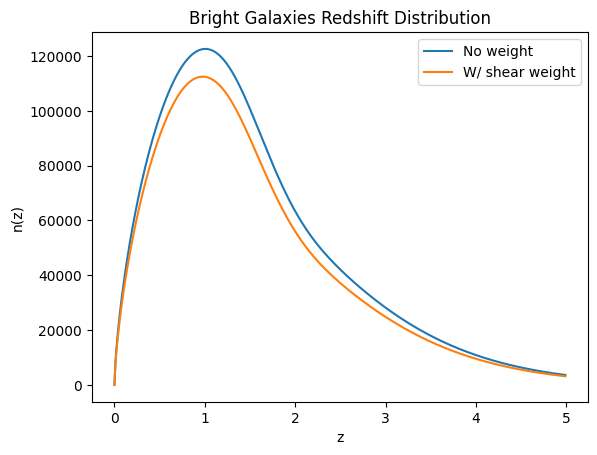

In [7]:
nz_w0 = Table.read('/share/gpu0/jjwhit/COSMOS_v1/cosmos_zdist_faint_w0.asc', format='ascii')
nz_w1 = Table.read('/share/gpu0/jjwhit/COSMOS_v1/cosmos_zdist_faint_w1.asc', format='ascii')

plt.plot(nz_w0['col1'], nz_w0['col2'], label='No weight')
plt.plot(nz_w1['col1'], nz_w1['col2'], label='W/ shear weight')
plt.xlabel('redshift, z')
plt.ylabel('n(z)')
plt.legend()
plt.title('Bright Galaxies Redshift Distribution');

In [9]:
# These show the borders of the cosmos field
COSMOS_VERTICES = [(149.508, 2.880),
                   (149.767, 2.836),
                   (149.780, 2.887),
                   (150.040, 2.842),
                   (150.051, 2.893),
                   (150.363, 2.840),
                   (150.376, 2.890),
                   (150.746, 2.826),
                   (150.737, 2.774),
                   (150.790, 2.765),
                   (150.734, 2.449),
                   (150.787, 2.441),
                   (150.730, 2.125),
                   (150.785, 2.118),
                   (150.758, 2.013),
                   (150.768, 2.010),
                   (150.747, 1.910),
                   (150.799, 1.897),
                   (150.740, 1.580),
                   (150.481, 1.625),
                   (150.466, 1.572),
                   (150.211, 1.619),
                   (150.196, 1.567),
                   (149.887, 1.621),
                   (149.872, 1.571),
                   (149.617, 1.615),
                   (149.602, 1.566),
                   (149.493, 1.584),
                   (149.504, 1.637),
                   (149.450, 1.646),
                   (149.488, 1.855),
                   (149.433, 1.862),
                   (149.491, 2.178),
                   (149.436, 2.186),
                   (149.484, 2.445),
                   (149.431, 2.455),
                   (149.508, 2.880)]

def get_extend_radec(res, width):
    """ Calculates the extent of a region.

    Args:
        res: resolution.
        width: width.

    Returns:
        extent_radec: A list  representing the extent in terms of Right Ascension and Declination.
    """
    ra0, dec0 = (150.11, 2.24) #from cosmos.astro.caltech.edu

    # Creates a gnom projection centered at the reference point (ra0, dec0)
    proj = gnom.projector(ra0, dec0) 
    pix_size = res #arcmin

    # Calculate the extent across the region
    dx = np.deg2rad(width*pix_size/60./2) # number of degrees across
    dy = dx

    # Converts to Euclidean coordinates
    extent_xy = [-dx, dx, -dy, dy]
    ra_min, dec_min = proj.xy2radec(-dx, -dy)
    ra_max, dec_max = proj.xy2radec(dx, dy)
    extent_radec = [ra_min, ra_max, dec_min, dec_max]
    return extent_radec


## Apply Necessary Quality Cuts

Discard galaxies with redshift measurement problem.

In [11]:
# Creates a mask
# We actually keep everything, only potentially high z galaxies
selection = ((catalog_bright['z_problem'] == 0)
            )

# Restrict catalog to these objects
catalog_bright = catalog_bright[selection]

print("Bright catalog length: ",len(catalog_bright))
print("Number of objects with photometric redshift <0.6: ",len(catalog_bright[catalog_bright['zphot']<.6]))

Bright catalog length:  165159
Number of objects with photometric redshift <0.6:  22294


In [12]:
catalog_faint

Ra,Dec,Xs,Ys,MAG_AUTO,e1iso_rot4_gr_snCal,e2iso_rot4_gr_snCal,e1iso_rot1_gr_snCal,e2iso_rot1_gr_snCal,e1iso_snCal_rot4,e2iso_snCal_rot4,nhweight_int,rh,rg,next_dist,region,snratio,e1corr_rot,e2corr_rot
,,,,mag,,,,,,,"""""",pix,,,,,,
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,float64,float64,float64
149.4962041,2.503671882,26145.1,19081.9,26.4293,-0.391807,-0.272931,-0.391832,-0.272929,-0.399523,-0.274931,1.10225,2.20677,2.40406,0.0005411530101,2,2.66054,0.00225615,0.0117953
149.4911655,2.475661482,26242.8,18539.8,26.3311,-0.189076,-0.353381,-0.189439,-0.353491,-0.194043,-0.358837,1.17029,2.05077,3.05287,0.001729526987,2,2.22021,-0.0112607,-0.00602251
149.4909315,2.478106282,26247.3,18587.1,26.5114,0.0380846,0.227643,0.0382676,0.22768,0.0343632,0.223223,1.44661,1.89814,2.08483,0.00125844029,2,2.99019,-0.0065375,-0.00571937
149.4878873,2.461363582,26306.3,18263.1,25.5171,0.169123,0.0239485,0.168921,0.0238937,0.166559,0.0202858,1.61848,2.93953,3.8789,0.0008095747274,2,3.45289,-0.00777161,-0.000112764
149.4948102,2.501864782,26172.1,19047.0,26.0895,0.191054,-0.179009,0.190253,-0.17922,0.183895,-0.181324,1.18971,3.46235,3.66476,0.001397124281,2,2.23109,-0.000866496,0.00405476
149.487688,2.464864782,26310.1,18330.8,25.6,0.0548855,-0.165406,0.0548638,-0.165417,0.0520573,-0.169887,1.24962,2.88601,3.04925,0.00148947164,2,4.61166,-0.00496776,-0.00219766
149.4898679,2.478661882,26267.8,18597.9,25.0974,0.0168497,0.0431876,0.0165013,0.0430837,0.0132595,0.03913,1.34808,4.41121,4.44719,0.00125844029,2,4.98742,-0.00174109,-0.00141766
149.4936679,2.500929182,26194.2,19028.9,25.6567,-0.691742,-0.031747,-0.692222,-0.0318734,-0.69769,-0.0339283,1.22114,3.16193,3.631,0.001104277824,2,3.55566,0.000515929,0.00328892


In [13]:
print(catalog_bright.keys())

['Ra', 'Dec', 'Xs', 'Ys', 'MAG_AUTO', 'e1iso_rot4_gr_snCal', 'e2iso_rot4_gr_snCal', 'e1iso_rot1_gr_snCal', 'e2iso_rot1_gr_snCal', 'e1iso_snCal_rot4', 'e2iso_snCal_rot4', 'nhweight_int', 'rh', 'rg', 'next_dist', 'region', 'snratio', 'e1corr_rot', 'e2corr_rot', 'zphot', 'z_problem']


Text(0.5, 0, 'Faint Galaxies')

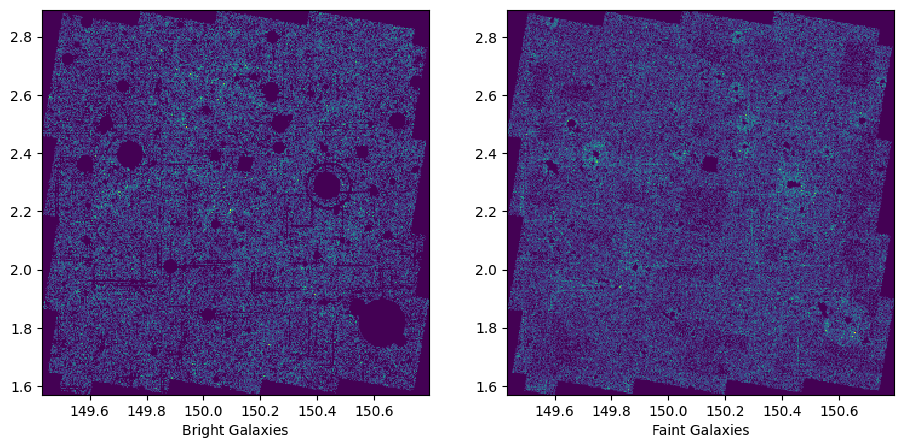

In [14]:
figure(figsize=(11,5))
subplot(121)
xlabel("Bright Galaxies")
hist2d(catalog_bright['Ra'], catalog_bright['Dec'], 320)
subplot(122)
hist2d(catalog_faint['Ra'], catalog_faint['Dec'], 320)
xlabel("Faint Galaxies")

In [15]:
#Merge catalog
catalog_full = Table()
catalog_full['Ra'] = np.concatenate([catalog_bright['Ra'], catalog_faint['Ra']])
catalog_full['Dec'] = np.concatenate([catalog_bright['Dec'], catalog_faint['Dec']])
catalog_full['e1iso_rot4_gr_snCal'] = np.concatenate([catalog_bright['e1iso_rot4_gr_snCal'], catalog_faint['e1iso_rot4_gr_snCal']])
catalog_full['e2iso_rot4_gr_snCal'] = np.concatenate([catalog_bright['e2iso_rot4_gr_snCal'], catalog_faint['e2iso_rot4_gr_snCal']])
catalog_full['nhweight_int'] = np.concatenate([catalog_bright['nhweight_int'], catalog_faint['nhweight_int']])



In [16]:
catalog_full

Ra,Dec,e1iso_rot4_gr_snCal,e2iso_rot4_gr_snCal,nhweight_int
float64,float64,float64,float64,float64
149.4959651,2.499495782,0.0392358,-0.574703,1.2926
149.4963267,2.504209582,-0.515389,-0.374299,1.12024
149.4928198,2.487398982,-0.185595,0.327772,1.72788
149.4862006,2.455142982,0.113546,0.00384063,0.429384
149.4883566,2.467923482,-0.170634,0.216532,0.770267
149.4872945,2.462888682,-0.142334,-0.149079,1.05549
149.4936394,2.499830082,0.561479,0.110478,1.46717
149.4877778,2.466954182,0.0983129,-0.30416,0.561906
149.4855088,2.460576982,0.00236967,0.0267271,1.35167


## Bin Ellipticity Catalog on Map with Given Pixel Size

kappaTNG resolution = 0.29 arcmin/pixel

In [17]:
from lenspack.utils import bin2d
from lenspack.image.inversion import ks93, ks93inv
from lenspack.peaks import find_peaks2d

# Compute boundaries of the field so that it fits in a 512x512 map. TODO: Change to 384x384 map size?
resolution = 0.29
width = 360
size = width * resolution / 60.

ra = median(catalog_full['Ra'])
dec = median(catalog_full['Dec'])
extent = [ra - size/2, ra + size/2, dec - size/2, dec + size/2]

In [18]:
# Bin ellipticity components based on galaxy position into a 320x320 map
e1map, e2map = bin2d(catalog_full['Ra'], catalog_full['Dec'], 
                     v=(catalog_full['e1iso_rot4_gr_snCal'], catalog_full['e2iso_rot4_gr_snCal']), 
                     w=catalog_full['nhweight_int'],
                     npix=width,
                     extent=extent)


Text(0.5, 1.0, 'e2')

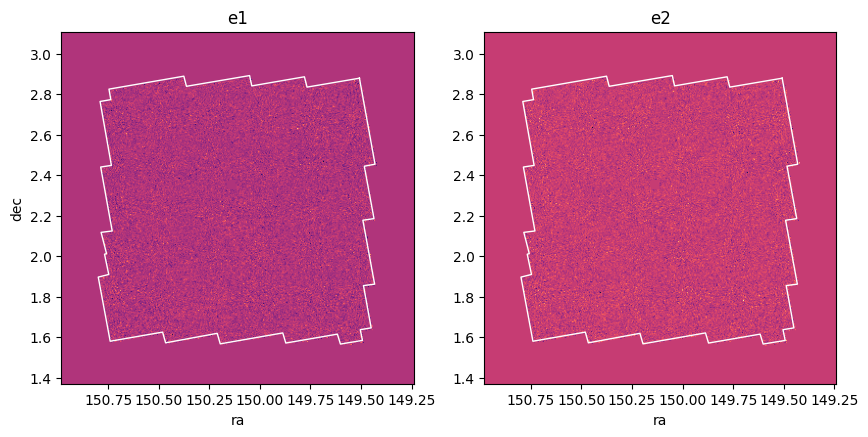

In [19]:
figure(figsize=[10,5])
subplot(121)
imshow(e1map, cmap='magma', origin='lower', extent=get_extend_radec(resolution, width))
xlim(gca().get_xlim()[::-1])
ra, dec = np.array(COSMOS_VERTICES).T
plot(ra, dec,  c='w', lw=1)
xlabel('ra')
ylabel('dec')
title('e1')

subplot(122)
imshow(e2map, cmap='magma', origin='lower', extent=get_extend_radec(resolution, width))
xlim(gca().get_xlim()[::-1])
ra, dec = np.array(COSMOS_VERTICES).T
plot(ra, dec,  c='w', lw=1)
xlabel('ra')
title('e2')

In [20]:
#Saving binned ellipticity maps
fits.writeto('/share/gpu0/jjwhit/COSMOS_v1/cosmos_full_e1_0.29arcmin{}.fits'.format(width), e1map.astype('float32'),
           overwrite=True)
fits.writeto('/share/gpu0/jjwhit/COSMOS_v1/cosmos_full_e2_0.29arcmin{}.fits'.format(width), -e2map.astype('float32'),
           overwrite=True)

## Creat map of Number of Galaxies per Pixel

In [21]:
n_gal_map_full = bin2d(catalog_full['Ra'], catalog_full['Dec'], 
                     npix=width,
                     extent=extent)

fits.writeto('/share/gpu0/jjwhit/COSMOS_v1/cosmos_full_ngal_0.29arcmin{}.fits'.format(width), n_gal_map_full.astype('float32'),
            overwrite=True)

Text(0.5, 1.0, 'Faint Catalog')

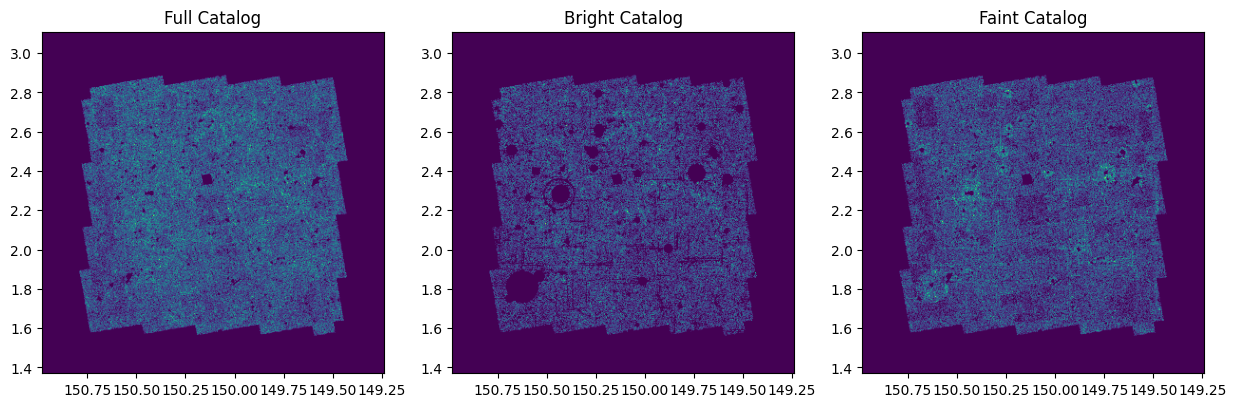

In [22]:
n_gal_map_bright = bin2d(catalog_bright['Ra'], catalog_bright['Dec'], 
                     npix=width,
                     extent=extent)

n_gal_map_faint = bin2d(catalog_faint['Ra'], catalog_faint['Dec'], 
                     npix=width,
                     extent=extent)

figure(figsize=[15,5])
subplot(131)
imshow(n_gal_map_full, origin='lower', extent=get_extend_radec(resolution, width))
xlim(gca().get_xlim()[::-1])
title('Full Catalog')

subplot(132)
imshow(n_gal_map_bright, origin='lower', extent=get_extend_radec(resolution, width))
xlim(gca().get_xlim()[::-1])
title('Bright Catalog')

subplot(133)
imshow(n_gal_map_faint, origin='lower', extent=get_extend_radec(resolution, width))
xlim(gca().get_xlim()[::-1])
title('Faint Catalog')

In [23]:
l = np.max(catalog_full['Ra'])-np.min(catalog_full['Ra'])
L = np.max(catalog_full['Dec'])-np.min(catalog_full['Dec'])
print('l: ',l)
print('L: ',L)
print('l*L: ',l*L)
print('n_gal / arcmin^2 =', len(catalog_full['Ra'])/l/L/60/60)

l:  1.3628894000000003
L:  1.3236485630000001
l*L:  1.8039865958379326
n_gal / arcmin^2 = 64.22765756721984


## Create Binary Mask for Empty Pixels

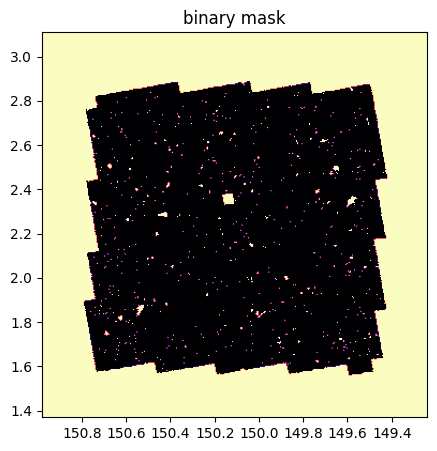

In [24]:
# Data mask
figure(figsize=[5,5])
m = n_gal_map_full == 0
imshow(m, cmap='magma', origin='lower', extent=get_extend_radec(resolution, width))
xlim(gca().get_xlim()[::-1])
title("binary mask")

mask = 1.-m

fits.writeto('/share/gpu0/jjwhit/COSMOS_v1/cosmos_full_mask_0.29arcmin{}.fits'.format(width), (1.-m).astype('float32'),
           overwrite=True)

### Recover Convergence via K-S Inversion

Perform a standard K-S reconstruction

In [25]:
kappaE, kappaB = ks93(e1map, -e2map) #E-band, B-band

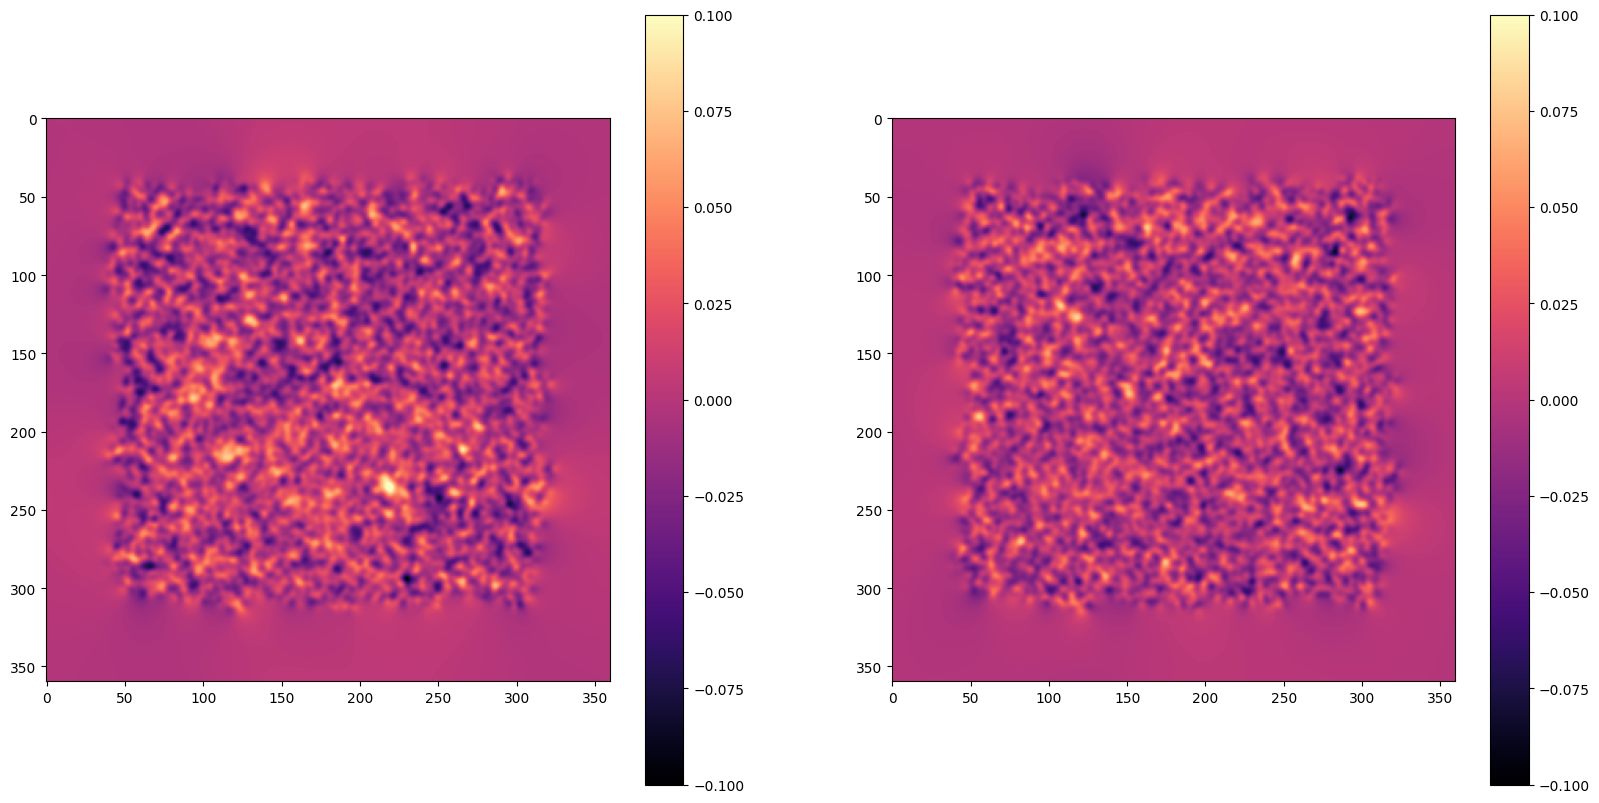

In [26]:
from scipy.ndimage import gaussian_filter
figure(figsize=[20,10])
subplot(121)
mappable = imshow(gaussian_filter(kappaE,2)[:,::-1], cmap='magma',vmax=0.1,vmin=-0.1);colorbar()
subplot(122)
mappable = imshow(gaussian_filter(kappaB,2)[:,::-1], cmap='magma',vmax=0.1,vmin=-0.1);colorbar()


## Redshift Distribution of the Full Catalog

Note: The faint catalog has a x100 factor in its redshift distribution.

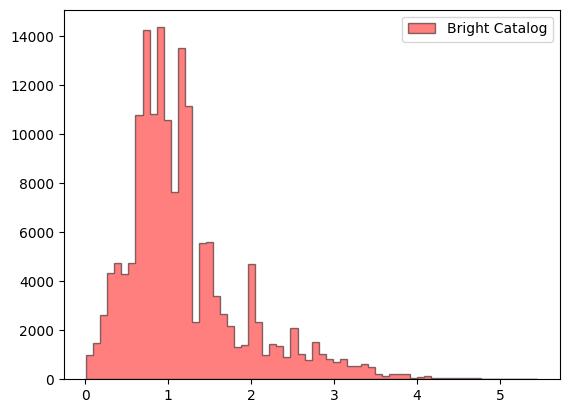

In [27]:
hist(catalog_bright['zphot'], bins=64, color="red", alpha=0.5, ec="k", histtype='stepfilled',
     label='Bright Catalog');
legend()

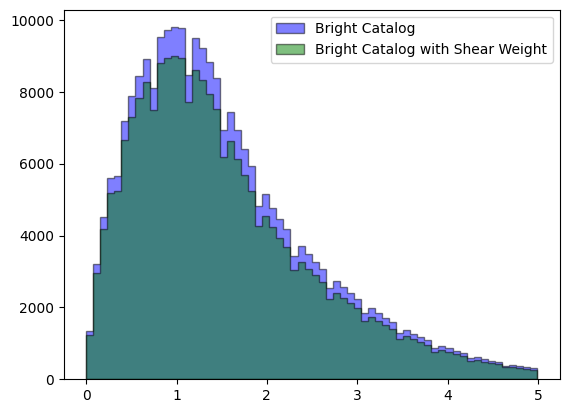

In [28]:
hist(nz_w0['col1'], weights=nz_w0['col2']/100, bins=64, color="blue", alpha=0.5, ec="k", histtype='stepfilled',
     label='Bright Catalog');

hist(nz_w1['col1'], weights=nz_w1['col2']/100, bins=64, color="green", alpha=0.5, ec="k", histtype='stepfilled',
     label='Bright Catalog with Shear Weight');
legend()

In [29]:
np.max(catalog_bright['zphot'])

5.446

In [30]:
z = np.arange(0, 5.5, .01)

nz_bright = np.zeros(z.shape)
for z_gal in catalog_bright['zphot']:
    nz_bright[int(np.ceil(z_gal*100))] += 1
    
nz_faint = np.zeros(z.shape)
nz_faint[0:500] = nz_w0['col2']/100

nz_faint_w = np.zeros(z.shape)
nz_faint_w[0:500] = nz_w1['col2']/100

nz_full = nz_faint + nz_bright
nz_full_w = nz_faint_w + nz_bright

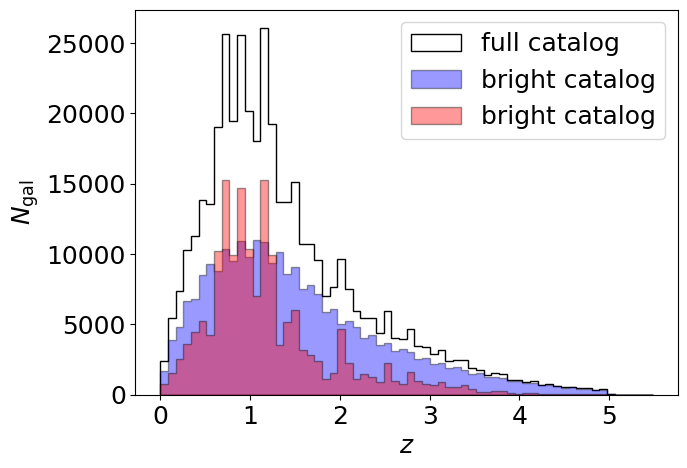

In [32]:
figure(figsize=(7,5))
hist(z, weights=nz_full, bins=64, color="white", alpha=1, ec="k", histtype='stepfilled',
     label='full catalog');
hist(z, weights=nz_faint, bins=64, color="blue", alpha=.4, ec="k", histtype='stepfilled',
     label='bright catalog');
hist(z, weights=nz_bright, bins=64, color="red", alpha=.4, ec="k", histtype='stepfilled',
     label='bright catalog');
legend(fontsize=18)
xlabel(r'$z$', fontsize=18)
ylabel(r'$N_\mathrm{gal}$', fontsize=18)
xticks(fontsize=18)
yticks(fontsize=18)
savefig('/share/gpu0/jjwhit/plots/redshift_distribution.pdf', transparent=True, bbox_inches='tight', pad_inches = 0) 
#TODO: Make a suitable directory/update save place

In [33]:
np.save("../../cosmos/hist_z.npy", z) #The x-axis of the full redshift histogram above.
np.save("../../cosmos/hist_n_z.npy", nz_full) #The corresponding y-axis (n_z).
redshift_catalog = np.array([i/100 for (i,z) in enumerate(nz_full) for _ in range(int(np.round(z)))])
np.save("../../cosmos/redshift_catalog.npy", redshift_catalog) #All the redshift values in the full catalog.

Computing power spectrum can be found here: https://github.com/CosmoStat/jax-lensing/blob/master/papers/Remy2021/COSMOS_shape_catalog.ipynb from box 29 onward.